<a target="_blank" href="https://colab.research.google.com/github/https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day23.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Sorting Algorithms and Trees
## Day22

### CS66: Introduction to Computer Science II | Fall 2024

Thursday, November 21st, 2024
### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

No class on Tuesday, November 26th. Enjoy a longer Thanksgiving break :) 

## References for this lecture

Problem Solving with Algorithms and Data Structures using Python

Sections 6.6 - 6.12: [https://runestone.academy/ns/books/published/pythonds/SortSearch/toctree.html](https://runestone.academy/ns/books/published/pythonds/SortSearch/toctree.html)

The book covers 6 sorting algorithms: Bubble Sort, Selection Sort, Insertion Sort, Shell Sort, Merge Sort, and Quick Sort.

We did Bubble Sort, Insertion Sort, and Merge Sort Last time.

### In class: we will go through examples using index cards

Static images are copied from the book for those who are not in class - though I recommend reading those sections and walking through the algorithms on paper yourself.

## Merge Sort

Idea: Split the list in half. Sort both halves (recursively!) and then merege the two sorted halves together.




<div>
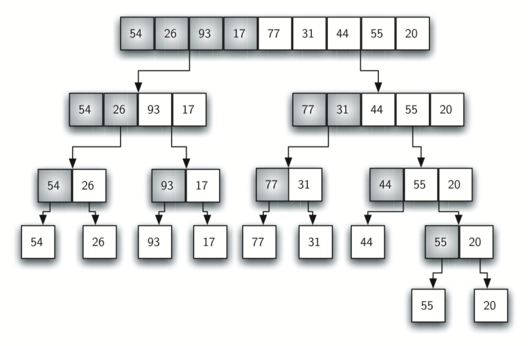
</div>


<div>
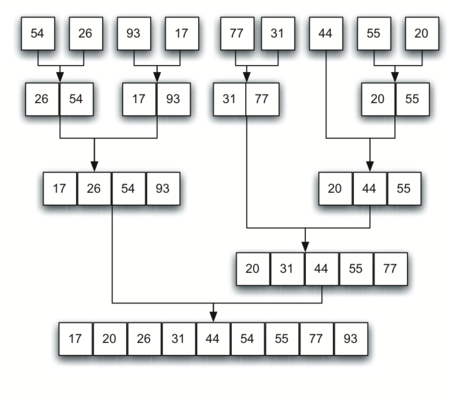
</div>

## Merge Sort Computational Complexity

__Merge Step:__ Merging together two sorted lists take $O(n)$ time - you keep track of an index into each smaller list and one into the new list you're copying them into. At each step, you just copy the next item from one of the smaller lists.

__How many times do you have to do that?__

* At the "bottom" level of recursion, you have $n/2$ lists each with $\leq 2$ items, so on the order of 2 steps done $n/2$ times which is $O(n)$
* At the next level, you have $n/4$ lists, each with $\leq 4$ items, so on the order of 4 steps done $(n/4)$ times, again $O(n)$.
* ... and so on

There are $\log_2(n)$ levels in the recursion since we split it in half each time (like binary search), so the entire algorithm takes $O(n \log(n))$




In [4]:
def mergeSort(alist):
    print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] <= righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    print("Merging ",alist)
    
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

Splitting  [54, 26, 93, 17, 77, 31, 44, 55, 20]
Splitting  [54, 26, 93, 17]
Splitting  [54, 26]
Splitting  [54]
Merging  [54]
Splitting  [26]
Merging  [26]
Merging  [26, 54]
Splitting  [93, 17]
Splitting  [93]
Merging  [93]
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
Splitting  [77, 31, 44, 55, 20]
Splitting  [77, 31]
Splitting  [77]
Merging  [77]
Splitting  [31]
Merging  [31]
Merging  [31, 77]
Splitting  [44, 55, 20]
Splitting  [44]
Merging  [44]
Splitting  [55, 20]
Splitting  [55]
Merging  [55]
Splitting  [20]
Merging  [20]
Merging  [20, 55]
Merging  [20, 44, 55]
Merging  [20, 31, 44, 55, 77]
Merging  [17, 20, 26, 31, 44, 54, 55, 77, 93]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


## Group Activity Problem 1

When sorting, we usually don't just have a big list of numbers - often we have objects that need to be sorted by a variety of criteria. Re-write the `mergeSort` function so that we could sort our movie data by the World Sales field, and sort it from largest to smallest. 

Here's an example of what the results should look like if you did it right (printing only the first 10 items in the sorted list). This code shows you how you can use the the built-in `sort` method with data like this (you give it a function that returns the value of the thing you want to sort by), but you will actually change some of the code inside the `mergeSort` function to make that one work.

In [6]:
import json
from pprint import pprint #for displaying the data in an easier-to-read way

def get_world_sales(x):
    return x["World Sales"]

with open("HighestGrossingMovies.json") as moviefile:
    movies = json.load(moviefile)
    
    
movies.sort(key=get_world_sales,reverse=True)
pprint(movies[:10])

[{'Distributor': 'Twentieth Century Fox',
  'Domestic Sales': 760507625,
  'Genre': "['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",
  'International Sales': 2086738578,
  'MPAA Rating': 'PG-13',
  'Release Date': 'December 16, 2009',
  'Runtime': '2 hr 42 min',
  'Summary': 'A paraplegic Marine dispatched to the moon Pandora on a unique '
             'mission becomes torn between following his orders and protecting '
             'the world he feels is his home.',
  'Title': 'Avatar (2009)',
  'World Sales': 2847246203},
 {'Distributor': 'Walt Disney Studios Motion Pictures',
  'Domestic Sales': 858373000,
  'Genre': "['Action', 'Adventure', 'Drama', 'Sci-Fi']",
  'International Sales': 1939128328,
  'MPAA Rating': 'PG-13',
  'Release Date': 'April 24, 2019',
  'Runtime': '3 hr 1 min',
  'Summary': 'After the devastating events of Avengers: Infinity War, the '
             'universe is in ruins. With the help of remaining allies, the '
             "Avengers assemble once more in orde

## Next Topic: Trees

A __tree__ data structure is a collection of nodes that express a hierarchical relationship.

You can think of it like a linked list, but each node may be linked to more than one other node.

## Example: A tree representing an animal taxonomy


<center>
<div>
<img src="biology.png" width="500"/>
</div>
</center>

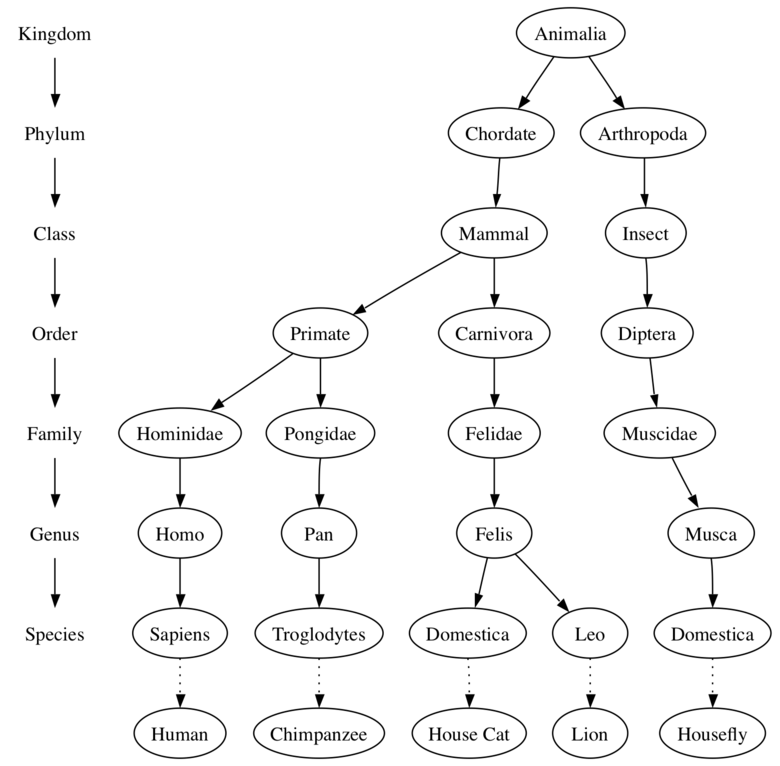

## Vocabulary

__Node:__ the circles - may contain a key and other information

__Edge:__ arrow representing relationship between two nodes

__Parent/Child:__ the edge goes out from the parent node and into the child node. (Mammal is the parent of Carnivora, Carnivora is the child of Mammal)

__Root:__ node with no parent (Animalia)

__Leaf:__ nodee with no children (Human, Chimpanzee, etc.)

## Example: A tree representing the folder structure on a computer



<center>
<div>
<img src="directory.png" width="700"/>
</div>
</center>

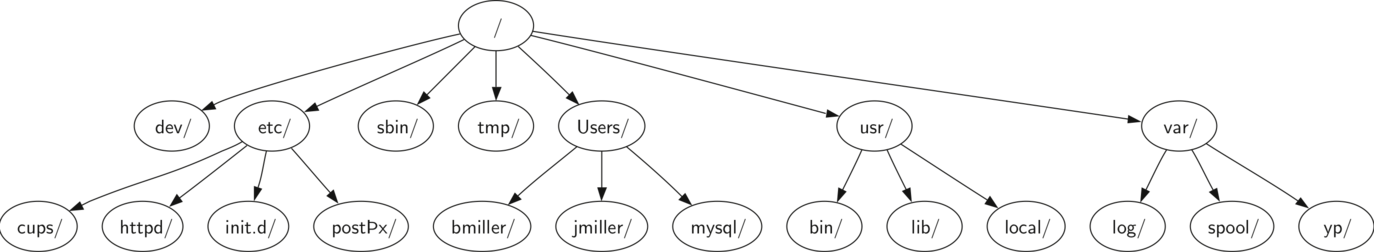

## Example: Natural langauge parse tree

Parse tree for the sentence "Homer hit Bart"

<center>
<div>
<img src="nlParse.png" width="350"/>
</div>
</center>
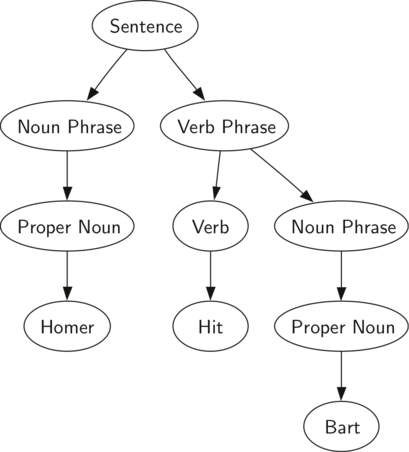

## Example: Expression Parse Tree

Parse tre for the expression $((7+3)*(5−2))$

<center>
<div>
<img src="meParse.png" width="350"/>
</div>
</center>
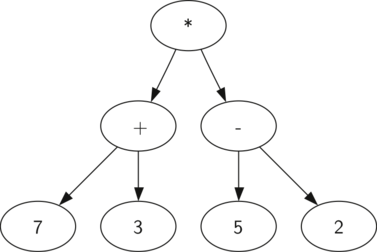

## Binary Search Tree

A __Binary Search Tree__ is a tree that allows a search operation to be done similar to a binary search.

Like hash tables, they are commonly used to implement the _set_ and _map_ abstract data types.

The book's code: BST for implementing a _map_ ([https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeImplementation.html](https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeImplementation.html) )


__Reminder:__ Set operations: `add`, `contains`/`__contains__`, `remove`, `size`/`__len__`

## Binary Search Tree Nodes

BST Nodes have at most 2 children, called _left child_ and _right child_

Nodes in left subtree have value less than this node

Nodes in right subtree have value more than this node

This is true for every node!

<center>
<div>
<img src="simpleBST.png" width="350"/>
</div>
</center>


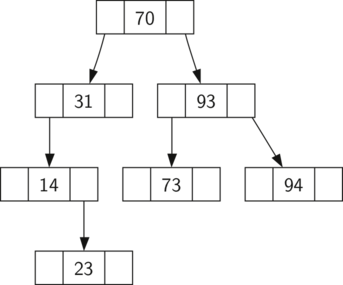

## An Example:

```python
to_sort = [54, 26, 93, 17, 77, 31, 44, 55, 20]
```

Whiteboard.

## Designing the BST Node

Here's what our Linked List node looked like:

In [ ]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext


## Group Activity Problem 1

Design a node for a binary search tree

In [ ]:
class BSTNode:
    def __init__(self,initdata):
        #fill in the rest
        
    #add any methods that you think will be helpful

#we could create a new node like this
mynode = BSTNode(42)

## Adding items to the BST

BSTs allow for good use of recursion

We can create an `add` method right inside the BST Node class

Here's the pseudocode

* if the new item is less than this node's value
    * if this node doesn't have a left child, create a new BST node and make it this node's left child
    * otherwise, recursively add the item to the left subtree
* if the new item is greater than this node's value
    * if this node doesn't have a right child, create a new BST node and make it this node's right child
    * otherwise, recursively add the item to the right subtree


## Group Activity Problem 2

Implement the `add` method in the BST Node class using this algorithm.

Discuss: Is it possible to create an empty tree with the class we've written?

In [ ]:
    #put this method into BSTNode class
    def add(self,new_val):
        #implement the code here

## Group Activity Problem 3

Discuss: Is it possible to create an empty tree with the class we've written?

## Creating the BSTSet Class

Let's now create a class to represent a whole tree made up of BST Nodes
* all of the real work is being done by the `BSTNode` class
* we need to keep track of the _root_ node
* we need to write methods that call the `BSTNode` methods

In [ ]:
class BSTSet:
    def __init__(self):
        self.__root = None #start with an empty tree!
        
    def add(self,new_val):
        if self.__root == None:
            self.__root = BSTNode(new_val)
        else:
            self.__root.add(new_val)
            
myset = BSTSet()
myset.add(4)
myset.add(7)
myset.add(2)
myset.add(9)

## Group Activity Problem 4

Implement a `search` method in the `BSTNode` class - again use recursion.

Write the associated method in `BSTSet` (suggestion: call it `__contains__` in `BSTSet` so that you can use it with the `in` operator.

In [ ]:
myset = BSTSet()
myset.add(4)
myset.add(7)
myset.add(2)
myset.add(9)

print( 7 in myset ) #should be True
print( 1 in myset ) #should be False

## Group Activity Problem 5

What would the tree look like in a worst-case search? So then what is the computational complexity of your search? What about `add`?

After you have a good guess, check out [https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeAnalysis.html](https://runestone.academy/ns/books/published/pythonds/Trees/SearchTreeAnalysis.html) to see if you agree with the book.